## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [24]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
dfc = df[(df['Number of Discharges'] != 'Not Available')]
dfc.loc[:, 'Number of Discharges'] = dfc['Number of Discharges'].astype(int)
dfc = dfc.sort('Number of Discharges')

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


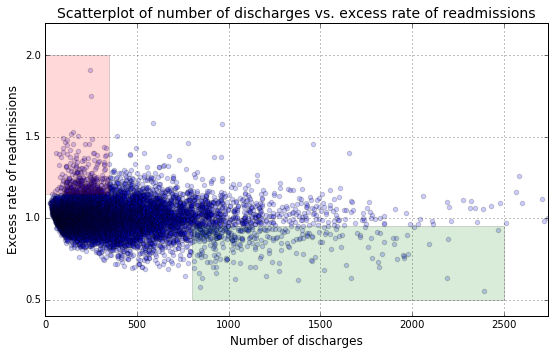

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in dfc['Number of Discharges'][81:-3]]
y = list(dfc['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## A. Do you agree with the above analysis and recommendations? Why or why not?

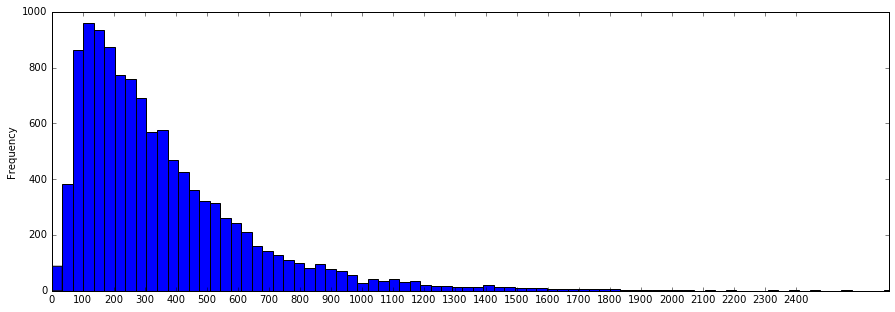

In [5]:
dfc['Number of Discharges'].plot(kind="hist", xlim=(0,2700), xticks=[i*100 for i in range(25)], figsize=(15,5), bins=200);

 The distribution of "Number of Discharges" has a positive skew (or right-skewed due to the mean occuring to the right of the median). This is not a normal distribution.

In [6]:
np.round(dfc['Number of Discharges'].describe(), 2)

count    11578.00
mean       362.91
std        309.18
min          0.00
25%        157.00
50%        280.00
75%        472.75
max       6793.00
Name: Number of Discharges, dtype: float64

 The "Number of Discharges" IQR (or 50% of the distribution) occurs between 157 and 472.75. The descriptive statistics, shown in section "B" in the Preliminary Report above, are given for a "Number of Discharges" outside of the IQR. In other words, the main part (the part containing the median and the mean) of that distribution is ignored in the above analysis.

In [7]:
# Check stats in section "B"

# In hospitals/facilities with number of discharges < 100
dfc_100 = dfc[dfc['Number of Discharges'] < 100]
dfc_100_errgt1 = dfc_100['Excess Readmission Ratio'][dfc_100['Excess Readmission Ratio'] > 1]

dfc_100_mean = np.round(dfc_100['Excess Readmission Ratio'].mean(), 4)
dfc_100_gt1 = round((len(dfc_100_errgt1) / len(dfc_100)) * 100, 2)
dfc_100_occur = np.round(len(dfc_100) / len(dfc), 2)

print "In hospitals/facilities with number of discharges < 100: \n"
print "mean excess readmission rate is", dfc_100_mean
print dfc_100_gt1, "% have excess readmission rate greater than 1"
print "percentage of number of discharges < 100 is", dfc_100_occur, "%", "\n\n"

# In hospitals/facilities with number of discharges > 1000
dfc_1000 = dfc[dfc['Number of Discharges'] > 1000]
dfc_1000_errgt1 = dfc_1000['Excess Readmission Ratio'][dfc_1000['Excess Readmission Ratio'] > 1]

dfc_1000_mean = np.round(dfc_1000['Excess Readmission Ratio'].mean(), 4)
dfc_1000_gt1 = round((len(dfc_1000_errgt1) / len(dfc_1000)) * 100, 2)
dfc_1000_occur = np.round(len(dfc_1000) / len(dfc), 2)

print "In hospitals/facilities with number of discharges < 100: \n"
print "mean excess readmission rate is", dfc_1000_mean
print dfc_1000_gt1, "% have excess readmission rate greater than 1"
print "percentage of number of discharges < 100 is", dfc_1000_occur, "%"

In hospitals/facilities with number of discharges < 100: 

mean excess readmission rate is 1.0226
59.18 % have excess readmission rate greater than 1
percentage of number of discharges < 100 is 0.11 % 


In hospitals/facilities with number of discharges < 100: 

mean excess readmission rate is 0.9783
44.49 % have excess readmission rate greater than 1
percentage of number of discharges < 100 is 0.04 %


 As shown above, the statistics in Section "B" of the Preliminary Report are looking at < 1% of the dataset.  Furthermore, one of the statistics is not correct. Only 59.18% of hospitals with Number of Discharges < 100 have an excess readmission rate of greater than 1.

The r^2 value (or coeff. of determination) for this linear regression is: 7.64474243167e-12
The slope for this linear regression is: -2.90105173306e-05


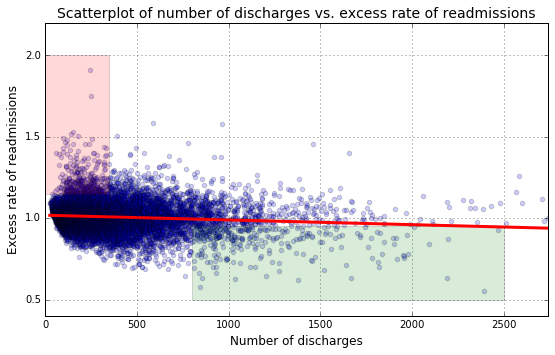

In [25]:
# Create a data frame with only 2 columns of interest
dfc2 = dfc.ix[:,4:7]
del dfc2['Footnote']

# Get rid of 0 discharges
dfc2 = dfc2[dfc2['Number of Discharges'] != 0]

# Build the x1 and y1 arrays for the linear regression
x1 = dfc2['Number of Discharges']
y1 = dfc2['Excess Readmission Ratio']

# Perform a linear regression on all data in dfc2
slope, intercept, r_val, p_val, std_err = stats.linregress(x1,y1)
print "The r^2 value (or coeff. of determination) for this linear regression is:", std_err ** 2
print "The slope for this linear regression is:", slope

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1, alpha=0.2)
plt.plot(x1, (slope * x1 + intercept), 'r-', color='Red', linewidth=3.0)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

 A linear regression performed on the entire dataset (excluding Number of Discharges = 0): 

 1) shows a VERY slight decrease in Excess Rate of Readmissions for increasing Number of Discharges; slope is   -2.9x10^-5

 2) doesn't fit the data very well; Coeff. of Determination is 7.6 x 10^-12

The r^2 value (or coeff. of determination) for this linear regression is: 1.90582517644e-10
The slope for this linear regression is: -4.65798377866e-05


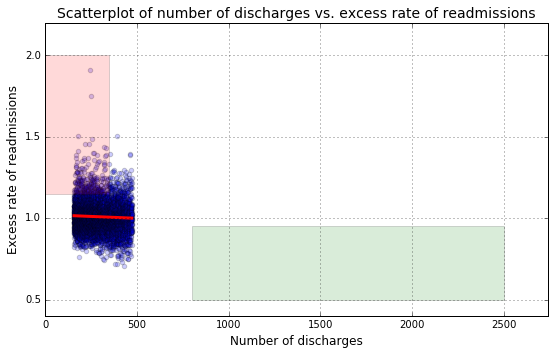

In [9]:
# Create a data frame with only 2 columns of interest
dfc2 = dfc.ix[:,4:7]
del dfc2['Footnote']

# Find the IQR of Number of Discharges and select only the data in the IQR
q75, q25 = np.percentile(dfc['Number of Discharges'], [75 ,25])
dfc2 = dfc2[(dfc2['Number of Discharges'] >= q25) & ((dfc2['Number of Discharges'] <= q75))]

# Build the x1 and y1 arrays for the linear regression
x1 = dfc2['Number of Discharges']
y1 = dfc2['Excess Readmission Ratio']

# Perform a linear regression on the IQR only data of dfc2
slope, intercept, r_val, p_val, std_err = stats.linregress(x1,y1)
print "The r^2 value (or coeff. of determination) for this linear regression is:", std_err ** 2
print "The slope for this linear regression is:", slope

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1,alpha=0.2)
plt.plot(x1, (slope * x1 + intercept), 'r-', color='Red', linewidth=3.0)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

 A linear regression performed on the IQR range only: 

1) shows a VERY slight decrease in Excess Rate of Readmissions for increasing Number of Discharges; slope is   -4.7x10^-5

2) doesn't fit the data very well; Coeff. of Determination is 1.9 x 10^-10

In summary, the distribution of Number of Discharges is Right Skewed (not normal) which can introduce bias to a linear regression (or most kinds of linear fitting). The Preliminary Report's statement about the Readmissions trending down with Number of Discharges is biased by the right-skewness of the Number of Discharges. Also, a linear regression shows only a very slight trend down and doesn't fit the data very well (even when looking only at the IQR for Number of Discharges). Also, the statistics section of the Preliminary Report gives statistical data for the highest and lowest 1% of the data and ignores the bulk of the data. For all of these reasons, I do not agree with the Preliminary Report. I believe that the correlation between Readmissions and Discharges is likely circumstantial.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

## - Setup an appropriate hypothesis test.

## - Compute and report the observed significance value (or p-value).

## - Report statistical significance for α = .01.

## - Discuss statistical significance and practical significance

Since the data provided is actually the population data set (instead of a sample of the population), I can randomly sample (i.e. build two normally distributed samples) on either side of the median of Number of Discharges and then perform a hypothesis test for equal Readmission Rate of the samples. In other words, I will be trying to determine if Readmission for hospitals with a high Number of Discharges is statistically equal to the Readmissions for hospitals with a low Number of Discharges.

In [17]:
# Create a data frame with only 2 columns of interest
dfc2 = dfc.ix[:,4:7]
del dfc2['Footnote']

# Get rid of 0 discharges
dfc2 = dfc2[dfc2['Number of Discharges'] != 0]

# Seperate the dataset (dfc) at the median to give dfch for high Number of Discharges and dfcl for low Number of Discharges
median = np.median(dfc2['Number of Discharges'])
dfch = dfc2[dfc2['Number of Discharges'] > median]
dfch_rr = list(dfch['Excess Readmission Ratio'])
dfcl = dfc2[dfc2['Number of Discharges'] <= median]
dfcl_rr = list(dfch['Excess Readmission Ratio'])

# Take random samples to create a normal distribution for the Hospitals with high and low Number of Discharges
highsamp = []
lowsamp = []

n = 100   # Define the sample size

for i in range(9999):
    meanh = np.mean(np.random.choice(dfch_rr, size=n))
    highsamp.append(meanh)
    
for i in range(9999):
    meanl = np.mean(np.random.choice(dfcl_rr, size=n))
    lowsamp.append(meanl)    

In [31]:
# find the means, standard deviations, and the difference of means between our two normally distributed samples
highsamp_mean = np.mean(highsamp)
lowsamp_mean = np.mean(lowsamp)

diffmean_samp = highsamp_mean - lowsamp_mean

highsamp_std = np.std(highsamp)
lowsamp_std = np.std(lowsamp)

# Find the standard error
se_samp = np.sqrt((highsamp_std / n) + (lowsamp_std / n))

# Find the p-value
p_value = 2 * stats.norm.cdf(0, diffmean_samp, se_samp)

print "The P-Value is ", p_value

The P-Value is  0.988667084457


Since the P-value is not less than our significance level of 0.01, we do not reject the null hypothesis. In otherwords, there is no meaningful difference between the readmission rate of hospitals with low and high Number of Discharges.